# Ансамбли моделей машинного обучения. Часть 2.

## Задание

1. Выберите набор данных (датасет) для решения задачи классификации или регресии.

2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.

3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.

4. Обучите следующие ансамблевые модели:

- одну из моделей группы стекинга.
- модель многослойного персептрона. По желанию, вместо библиотеки scikit-learn возможно использование библиотек TensorFlow, PyTorch или других аналогичных библиотек.
- двумя методами на выбор из семейства МГУА (один из линейных методов COMBI / MULTI + один из нелинейных методов MIA / RIA) с использованием библиотеки gmdh.<br>
В настоящее время библиотека МГУА не позволяет решать задачу классификации !!!<br>
Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

## Импорт основных библиотек

In [93]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from scipy.optimize import fmin_tnc
from IPython.display import Image
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Описание данных

In [94]:
data = pd.read_csv('laptop_cleaned2.csv', sep=",")


In [95]:
data.shape

(1020, 29)

In [96]:
data.dtypes

Unnamed: 0                  int64
Name                       object
Brand                      object
Price                       int64
Rating                    float64
Processor_brand            object
Processor_name             object
Processor_variant          object
Processor_gen             float64
Core_per_processor        float64
Total_processor           float64
Execution_units           float64
Low_Power_Cores           float64
Energy_Efficient_Units      int64
Threads                   float64
RAM_GB                      int64
RAM_type                   object
Storage_capacity_GB         int64
Storage_type               object
Graphics_name              object
Graphics_brand             object
Graphics_GB               float64
Graphics_integreted        object
Display_size_inches       float64
Horizontal_pixel            int64
Vertical_pixel              int64
ppi                       float64
Touch_screen                 bool
Operating_system           object
dtype: object

In [97]:
data.head(10)

,Unnamed: 0,Name,Brand,Price,Rating,Processor_brand,Processor_name,Processor_variant,Processor_gen,Core_per_processor,...,Graphics_name,Graphics_brand,Graphics_GB,Graphics_integreted,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi,Touch_screen,Operating_system
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,HP,50399,4.30,AMD,AMD Ryzen 5,5600H,5.0,6.0,...,AMD Radeon RX 6500M,AMD,4.0,False,15.6,1920,1080,141.21,True,Windows 11 OS
1,1,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,Lenovo,26690,4.45,AMD,AMD Ryzen 3,7320U,7.0,4.0,...,AMD Radeon Graphics,AMD,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
2,2,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,HP,37012,4.65,Intel,Intel Core i3,1215U,12.0,6.0,...,Intel UHD Graphics,Intel,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,Samsung,69990,4.75,Intel,Intel Core i5,1240P,12.0,12.0,...,Intel Iris Xe Graphics,Intel,NaN,False,13.3,1080,1920,165.63,False,Windows 11 OS
4,4,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,Tecno,23990,4.25,Intel,Intel Core i3,1115G4,11.0,2.0,...,Intel UHD Graphics,Intel,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
5,5,Samsung Galaxy Book2 NP550XED-KA1IN 15 Laptop ...,Samsung,42990,4.35,Intel,Intel Core i5,1235U,12.0,10.0,...,Intel Integrated UHD,Intel,NaN,True,15.6,1920,1080,141.21,False,Windows 11 OS
6,6,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,Xiaomi,102990,4.25,Intel,Intel Core i9,14900HX,14.0,24.0,...,NVIDIA GeForce RTX 4060,NVIDIA,8.0,False,16.1,2560,1600,187.51,False,Windows 11 OS
7,7,Dell Inspiron 3520 D560896WIN9B Laptop (12th G...,Dell,33780,4.75,Intel,Intel Core i3,1215U,12.0,6.0,...,Intel UHD Graphics,Intel,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
8,8,HP 15s-fq5330TU Laptop (12th Gen Core i5/ 16GB...,HP,54990,4.00,Intel,Intel Core i5,1235U,12.0,10.0,...,Intel Integrated Iris Xe,Intel,NaN,True,15.6,1920,1080,141.21,False,Windows 11 OS
9,9,Asus Vivobook 15 X1502ZA-EJ544WS Laptop (12th ...,Asus,55980,4.55,Intel,Intel Core i5,12500H,12.0,12.0,...,Intel Iris Xe,Intel,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS


## Удаление пропусков

In [98]:
data.isnull().sum()
 

Unnamed: 0                  0
Name                        0
Brand                       0
Price                       0
Rating                      0
Processor_brand             0
Processor_name              0
Processor_variant          24
Processor_gen             129
Core_per_processor         12
Total_processor           447
Execution_units           447
Low_Power_Cores             0
Energy_Efficient_Units      0
Threads                    48
RAM_GB                      0
RAM_type                   22
Storage_capacity_GB         0
Storage_type                0
Graphics_name               2
Graphics_brand              2
Graphics_GB               652
Graphics_integreted         2
Display_size_inches         0
Horizontal_pixel            0
Vertical_pixel              0
ppi                         0
Touch_screen                0
Operating_system            0
dtype: int64

In [99]:
data = data.dropna(axis=1, how="any")

In [100]:
data.isnull().sum()


Unnamed: 0                0
Name                      0
Brand                     0
Price                     0
Rating                    0
Processor_brand           0
Processor_name            0
Low_Power_Cores           0
Energy_Efficient_Units    0
RAM_GB                    0
Storage_capacity_GB       0
Storage_type              0
Display_size_inches       0
Horizontal_pixel          0
Vertical_pixel            0
ppi                       0
Touch_screen              0
Operating_system          0
dtype: int64

## Выборки

In [101]:
data.dtypes

Unnamed: 0                  int64
Name                       object
Brand                      object
Price                       int64
Rating                    float64
Processor_brand            object
Processor_name             object
Low_Power_Cores           float64
Energy_Efficient_Units      int64
RAM_GB                      int64
Storage_capacity_GB         int64
Storage_type               object
Display_size_inches       float64
Horizontal_pixel            int64
Vertical_pixel              int64
ppi                       float64
Touch_screen                 bool
Operating_system           object
dtype: object

In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Name_id"] = le.fit_transform(data['Name'])
data["Brand_id"] = le.fit_transform(data['Brand'])
data["Processor_brand_id"] = le.fit_transform(data['Processor_brand'])
data["Processor_name_id"] = le.fit_transform(data['Processor_name'])
data["Storage_type_id"] = le.fit_transform(data['Storage_type'])
data["Touch_screen_bit"] = le.fit_transform(data['Touch_screen'])
data["Operating_system_id"] = le.fit_transform(data['Operating_system'])


In [103]:
numeric_data = data.select_dtypes(["number"])

<Axes: >

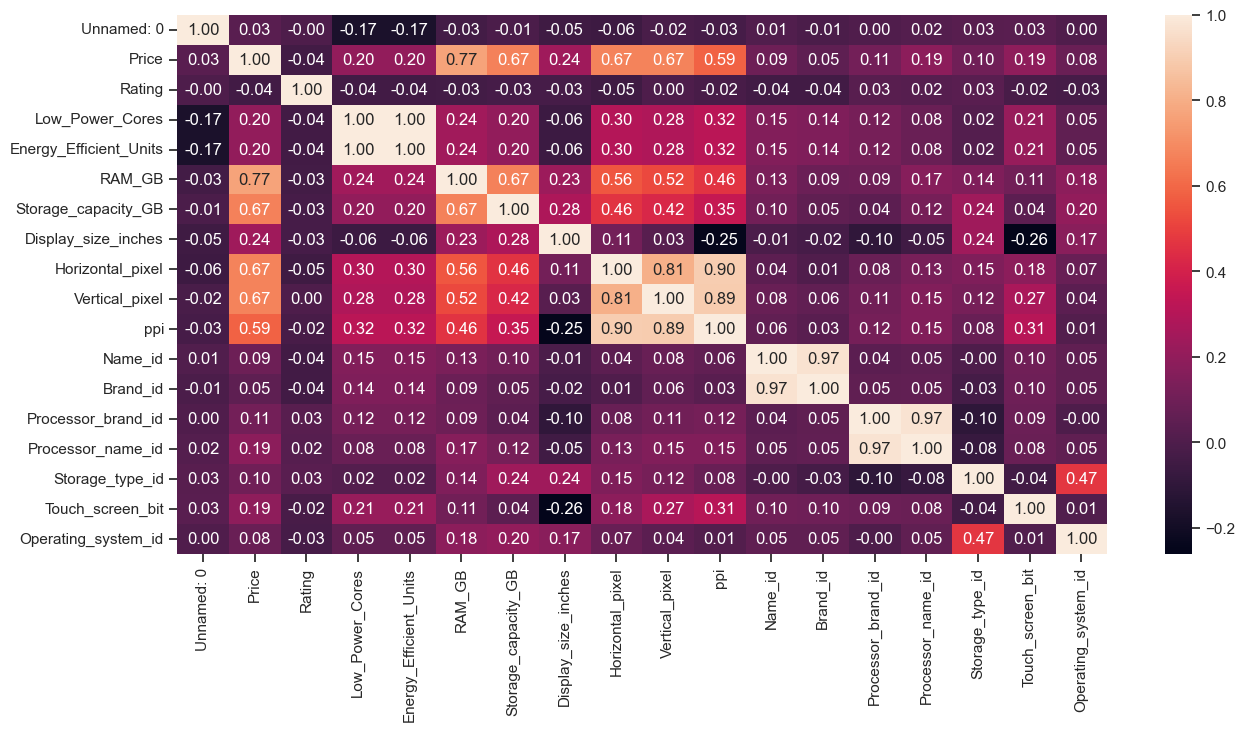

In [104]:
# Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(numeric_data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    numeric_data.drop(["Price"], axis=1), data["Price"], test_size=0.2, random_state=1)

## Стекинг

In [106]:
from heamy.estimator import Regressor, Classifier
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [107]:
array_mae = []

In [108]:
def val_mae(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = mean_absolute_error(y_test, y_pred)
    array_mae.append(result)
    return result

def print_mae(model):
    print(model)
    print('MAE={}'.format(val_mae(model)))

In [109]:
for model in [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=50)
]:
    print_mae(model)
    print('==========================')
    print()

LinearRegression()
MAE=24913.04654976365

DecisionTreeRegressor()
MAE=31129.58823529412

RandomForestRegressor(n_estimators=50)
MAE=21836.792254901957



In [110]:
dataset = Dataset(X_train, y_train, X_test)

# модели первого уровня
model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, name='tree')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression,name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'n_estimators': 50},name='rf')

In [111]:
pipeline = ModelsPipeline(model_tree, model_lr)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)


Metric: mean_absolute_error
Folds accuracy: [21881.622985906146, 20094.530646642186, 23241.66582933957, 19920.806098586625, 17172.82370376435, 16265.593730574969, 19526.366599475015, 19185.533361130787, 25760.716313029116, 18598.022667564783]
Mean accuracy: 20164.768193601354
Standard Deviation: 2679.0001480039286
Variance: 7177041.793005072


In [112]:
array_mae.append(19964.706744989795)

In [113]:
# Эксперимент 2
# Первый уровень - две модели: дерево и линейная регрессия
# Второй уровень: случайный лес

stacker = Regressor(dataset=stack_ds, estimator=RandomForestRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [22442.481341463415, 24355.741829268292, 23619.361097560977, 23454.333780487803, 17191.54390243902, 15618.276707317073, 17653.46901234568, 15511.183827160496, 26263.812098765437, 17278.642098765435]
Mean accuracy: 20338.884569557362
Standard Deviation: 3849.7494061787665
Variance: 14820570.490373766


In [114]:
array_mae.append(20199.891897922313)

In [115]:
# Эксперимент 3
# Первый уровень - три модели: дерево, линейная регрессия и случайный лес
# Второй уровень: линейная регрессия
pipeline = ModelsPipeline(model_tree, model_lr, model_rf)
stack_ds3 = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds3, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [18489.915899852127, 17762.629744060385, 19108.39903341756, 19164.55163192681, 13811.324382782246, 14218.360522120736, 16473.88389818764, 15043.17462797208, 23391.95334662315, 16102.622759925438]
Mean accuracy: 17356.681584686816
Standard Deviation: 2726.414381570574
Variance: 7433335.380034854


In [116]:
array_mae.append(17443.81381017577)

In [117]:
# Эксперимент 4
# Первый уровень - три модели: дерево, линейная регрессия и случайный лес
# Второй уровень: случайный лес
# Результат хуже чем в эксперименте 3
stacker = Regressor(dataset=stack_ds3, estimator=RandomForestRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [17048.671585365853, 21485.55097560976, 20589.106585365855, 19749.821341463412, 15458.856951219512, 13595.343292682928, 15289.550987654322, 16144.170864197531, 23003.23308641975, 16909.6624691358]
Mean accuracy: 17927.396813911473
Standard Deviation: 2926.379133826341
Variance: 8563694.834894206


In [118]:
array_mae.append(17776.81953688648)

In [119]:
def vis_models_quality(array_metric, array_labels, str_header, figsize=(5, 5)):
    fig, ax1 = plt.subplots(figsize=figsize)
    pos = np.arange(len(array_metric))
    rects = ax1.barh(pos, array_metric,
                     align='center',
                     height=0.5, 
                     tick_label=array_labels)
    ax1.set_title(str_header)
    for a,b in zip(pos, array_metric):
        plt.text(0.2, a-0.1, str(round(b,3)), color='white')
    plt.show()

In [120]:
array_labels = ['LR','TREE', 'RF', 'TREE+LR=>LR', 
                'TREE+LR=>RF', 'TREE+LR+RF=>LR', 'TREE+LR+RF=>RF']

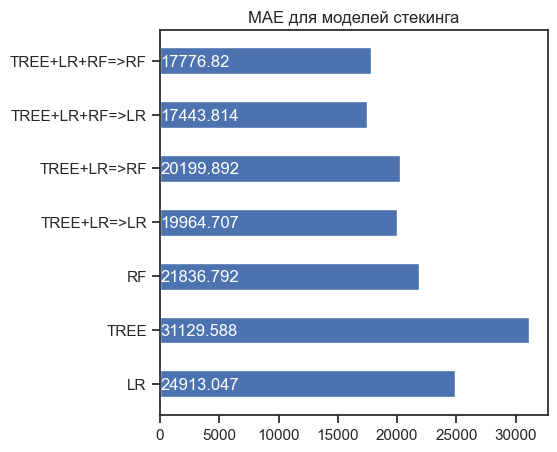

In [121]:
vis_models_quality(array_mae, array_labels, 'MAE для моделей стекинга')


На данном наборе данных результат стекинга точнее, чем у моделей первого уровня.

## Персептрон

In [122]:
from sklearn.neural_network import MLPRegressor
from time import time


In [123]:
mlp = MLPRegressor()
mlp.fit(X_train, y_train)


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [124]:
mlp_test_result = mlp.predict(X_test)


In [125]:
perc_mae = mean_absolute_error(y_test, mlp_test_result)
perc_mae

35923.6828767069

In [126]:
i = 0
df = pd.DataFrame(columns = ['alpha','max_iter','train_mae','test_mae','train_time'])
for a in [0.00001,0.0001,0.001,0.01, 0.1, 1, 10]:
    for mi in [10,100,200,500,1000,2000]:
        st = time()
        mlp = MLPRegressor(alpha=a, max_iter=mi)
        mlp.fit(X_train, y_train)
        end = time() - st
        
        acc_tr = mean_absolute_error(y_train, mlp.predict(X_train)) # Train Accuracy
        acc = mean_absolute_error(y_test, mlp.predict(X_test)) # Test Accuracy
        df.loc[i] = [a,mi,acc_tr,acc,end]
        i=i+1

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optim

In [127]:
df.sort_values(by="test_mae")

,alpha,max_iter,train_mae,test_mae,train_time
41,10.00000,2000.0,28737.058286,33137.703289,1.974889
17,0.00100,2000.0,28909.390209,33265.600196,1.777014
34,1.00000,1000.0,28967.640990,33347.319489,2.083390
4,0.00001,1000.0,29165.288665,33496.688637,2.172404
22,0.01000,1000.0,29226.436532,33532.718412,1.739365
23,0.01000,2000.0,29185.771610,33545.127362,1.291360
40,10.00000,1000.0,29251.180903,33559.734156,1.347380
35,1.00000,2000.0,29584.696239,33600.084362,2.317612
29,0.10000,2000.0,29664.497328,33661.074935,1.865865
11,0.00010,2000.0,30109.864599,33703.527681,1.144143


In [128]:
array_mae.append(min(df["test_mae"]))

In [129]:
acc = []
acc_tr = []
timelog = []
for l in [10,20,50,100,200,500,1000]:
    t = time()
    mlp = MLPRegressor(alpha=0.1, max_iter=200, hidden_layer_sizes=(l,))
    mlp.fit(X_train, y_train)
    endt = time() - t
        
    a_tr = mean_absolute_error(y_train, mlp.predict(X_train)) # Train Accuracy
    a = mean_absolute_error(y_test, mlp.predict(X_test)) # Test Accuracy

    acc_tr.append(a_tr)
    acc.append(a)
    timelog.append(endt)

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Opti

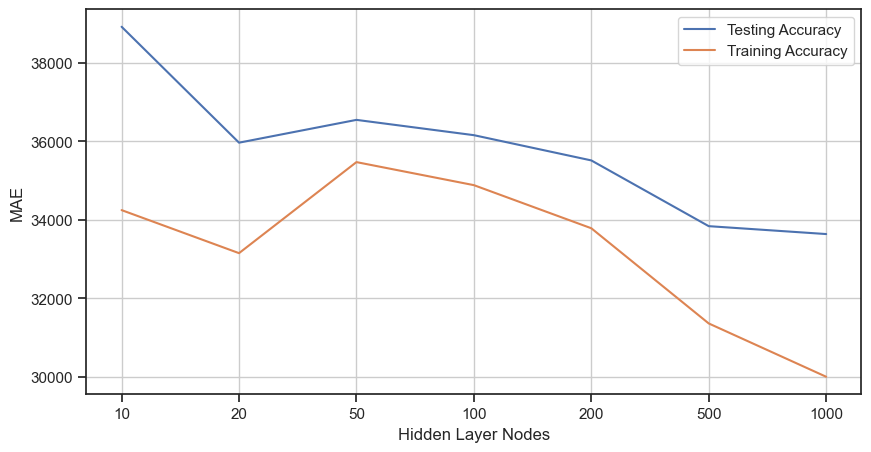

In [130]:
l = [10,20,50,100,200,500,1000]
N = len(l)
l2 = np.arange(N)
plt.subplots(figsize=(10, 5))
plt.plot(l2, acc, label="Testing Accuracy")
plt.plot(l2, acc_tr, label="Training Accuracy")
plt.xticks(l2,l)
plt.grid(True)
plt.xlabel("Hidden Layer Nodes")
plt.ylabel("MAE")
plt.legend()
plt.show()

## МГУА

In [131]:
# импорт
from gmdhpy import gmdh


In [132]:
model = gmdh.Regressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result = mean_absolute_error(y_test, y_pred)
print(model)
print('MAE={}'.format(result))

train layer0 in 0.06 sec
train layer1 in 0.23 sec
train layer2 in 0.24 sec
train layer3 in 0.22 sec
train layer4 in 0.22 sec
train layer5 in 0.23 sec
train layer6 in 0.22 sec
train layer7 in 0.22 sec
train layer8 in 0.23 sec
train layer9 in 0.23 sec
train layer10 in 0.22 sec
train layer11 in 0.23 sec
Self-organizing deep learning polynomial neural network
MAE=23056.687400008122


In [133]:
array_mae.append(result)

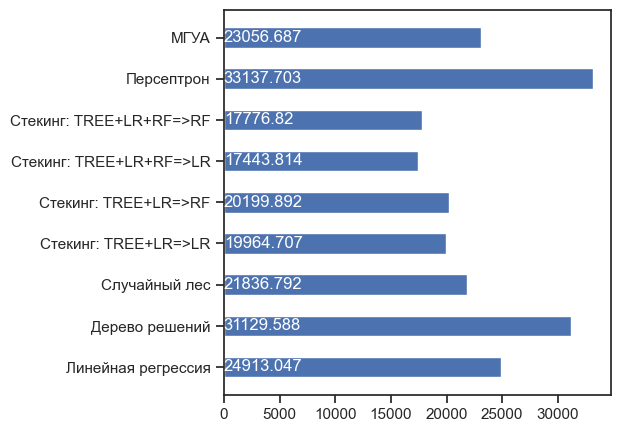

In [134]:
array_metric = array_mae
array_labels = ['Линейная регрессия','Дерево решений',
                 'Случайный лес', 'Стекинг: TREE+LR=>LR',
                   'Стекинг: TREE+LR=>RF', 'Стекинг: TREE+LR+RF=>LR', 'Стекинг: TREE+LR+RF=>RF', 
                   'Персептрон', 'МГУА']


figsize = (5, 5)
plt.title = "Сравнение MAE моделей"

fig, ax1 = plt.subplots(figsize=figsize)
pos = np.arange(len(array_metric))
rects = ax1.barh(pos, array_metric,
                     align='center',
                     height=0.5, 
                     tick_label=array_labels)
for a,b in zip(pos, array_metric):
    plt.text(0.2, a-0.1, str(round(b,3)), color='white')
plt.show()